<a href="https://colab.research.google.com/github/SweetyNayak-datascience/Data-science-/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [55]:
df = pd.read_csv("/content/Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [56]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
print(df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [58]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

x = pd.DataFrame(data.data, columns= data.feature_names)
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
print(x_train.shape, y_train.shape)
#Initialize and train a model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

#get feature  importance
feature_importance = model.feature_importances_

feature_importance_df =pd.DataFrame({'Feature':x.columns, 'Importance': feature_importance})

# sort feature
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


(120, 4) (120,)
             Feature  Importance
2  petal length (cm)    0.889473
3   petal width (cm)    0.077186
0  sepal length (cm)    0.016670
1   sepal width (cm)    0.016670


Text(0.5, 1.0, 'Feature Importance')

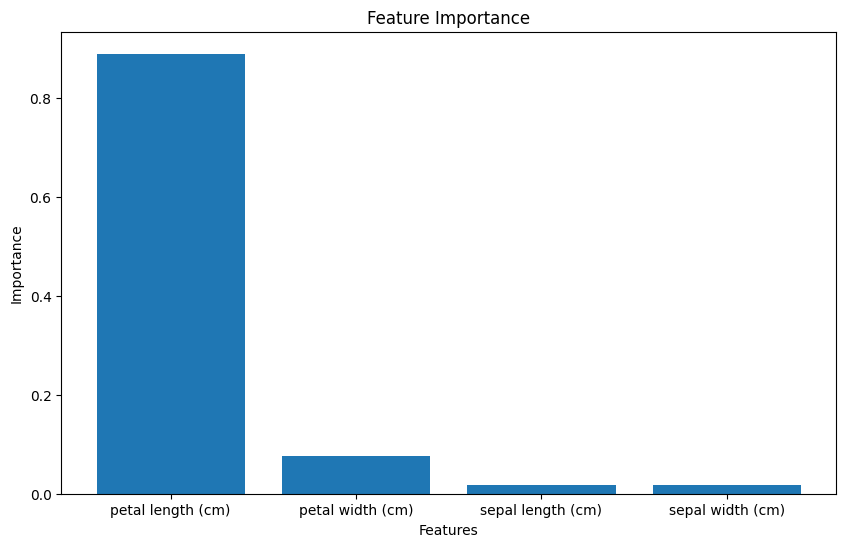

In [62]:
plt.figure(figsize=(10,6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

In [63]:
from sklearn.feature_selection import SelectKBest, chi2

# apply selectbest with chi
select_k_best = SelectKBest(score_func=chi2, k=2)
x_train_k_best = select_k_best.fit_transform(x_train, y_train)

print('Selected features:', x_train.columns[select_k_best.get_support()])




Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [64]:
feature_score = select_k_best.scores_

feature_score_df =pd.DataFrame({'Feature':x.columns, 'Score': feature_score})

# sort feature
feature_score_df = feature_score_df.sort_values(by='Score', ascending=False)

print(feature_score_df)


             Feature      Score
2  petal length (cm)  92.224928
3   petal width (cm)  52.409090
0  sepal length (cm)   8.227146
1   sepal width (cm)   3.244106


Text(0.5, 1.0, 'Feature Importance')

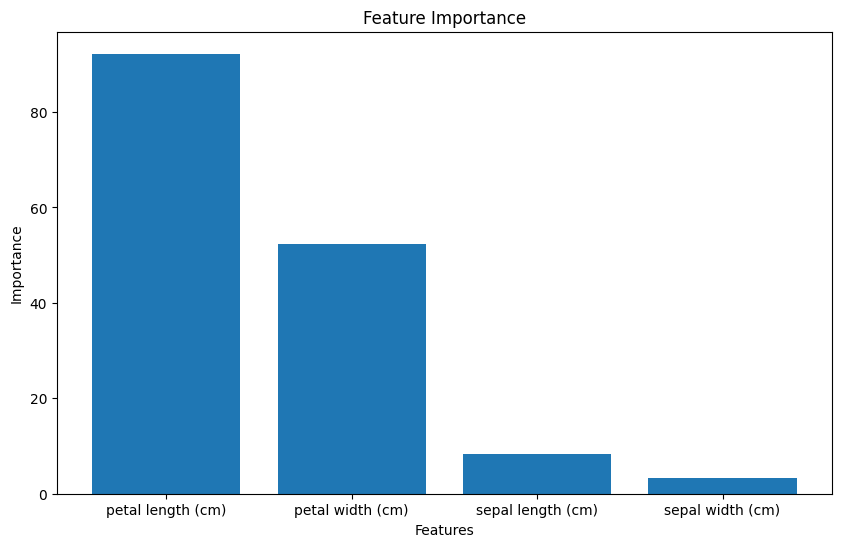

In [65]:
plt.figure(figsize=(10,6))
plt.bar(feature_score_df['Feature'], feature_score_df['Score'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

RFE

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Apply RFE with Logistic
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
x_train_rfe = rfe.fit_transform(x_train, y_train)

print('Selected features:',x_train.columns[rfe.get_support()])

Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [67]:
feature_score = rfe.ranking_

feature_score_df =pd.DataFrame({'Feature':x.columns, 'Score': feature_score})

# sort feature
feature_score_df = feature_score_df.sort_values(by='Score', ascending=False)

Text(0.5, 1.0, 'Feature Importance')

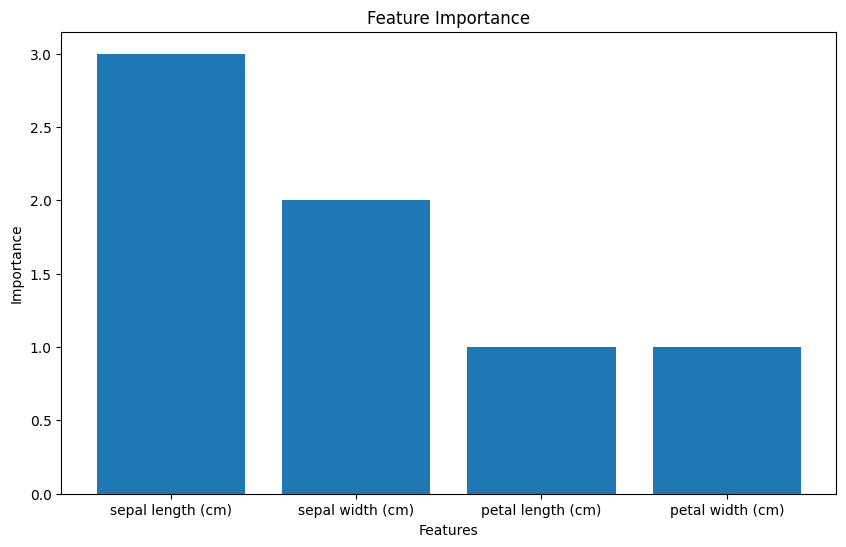

In [68]:
plt.figure(figsize=(10,6))
plt.bar(feature_score_df['Feature'], feature_score_df['Score'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

Random Forest Classifier(RFC)

In [69]:
from sklearn.ensemble import RandomForestClassifier

#Train random forest
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_

#Display features
feature_importances =pd.DataFrame({'Features': x_train.columns, 'Importance': importances})
print(feature_importances.sort_values('Importance', ascending=False, inplace=True))

None


Text(0.5, 1.0, 'Random Forest Score VS Features')

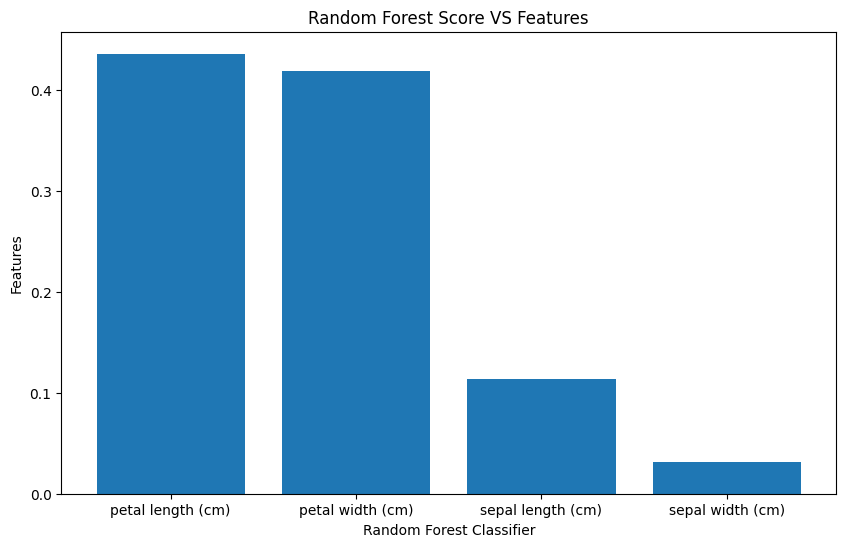

In [70]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances['Features'], feature_importances['Importance'])
plt.xlabel('Random Forest Classifier')
plt.ylabel('Features')
plt.title('Random Forest Score VS Features')

Seaborn

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
df.head()
iris_data = df.drop('Species', axis =1)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


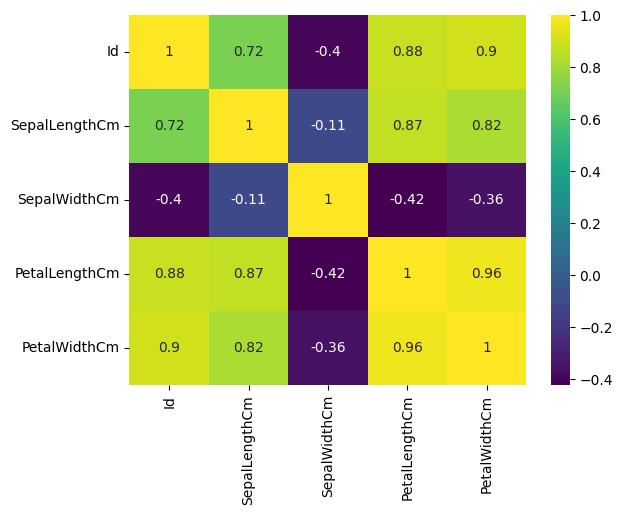

In [79]:
iris_corr_matrix = iris_data.corr()
print(iris_corr_matrix)
sns.heatmap(iris_corr_matrix, annot=True, cmap='coolwarm')
#sns.heatmap(iris_corr_matrix, annot=True, cmap='viridis')

plt.show()